# Bayesian Inference

This notebooks details an approach to Bayesian inference that is motivated from focusing on the likelihood. It is improtant to note that "inference" means "inference of model parameters given the observed data".

## Motivation

### Prior

In the world there may be some physical parameter of interest, $\theta$, that you would like to estimate or measure but can not do so directly. For example, the parameter might be the mass of a subatomic particle, the time of transit, or INSERT A THIRD EXAMPLE LATER. Given experience of the world, or other knowledge that you may already have that constrains the value of $\theta$, you can represent your belief of the value of $\theta$ in a probability density function referred to as the _prior_, $p\left(\theta\right)$.

In this example, to make the prior more notationally distinct it will be represented as $\pi\left(\vec{\theta}\right)$. This additionally represents the fact that the prior may exist for multiple parameters of interest, $\vec{\theta}$.

### Model and Likelihood

It might not be possible to directly observe $\vec{\theta}$, but observations can be made that can be influenced by the value of the paramter. These observations are data, $\vec{x}$, and their nature and dependence on the paramter can be modeled and formalized in a p.d.f. $p\left(\vec{x} \,\middle|\,\vec{\theta}\right)$.

From this model, $p$, and the observed data, $\vec{x}$, the likelihood function for the paramter values can then be constructed.

$$
L\left(\vec{\theta}\right) = L\left(\vec{\theta}\,\middle|\,\vec{x}\right)
$$

It is worth reiterating that the likelihood is a function of the model parameters only and so exists in parameter space, and it is not a p.d.f. and so under no requirement to be normalized to unity.

It is then natural, given that the likelihood encodes the comaptibility of possible paramter values with the observed data, to use this information to improve our beliefs for $\theta$ &mdash; to update the prior, $\pi\left(\vec{\theta}\right)$. Our degree of belief should still be formalized in a p.d.f., which means that the likelihood function acts as weights for all the values of parameter space

$$
\underbrace{L\left(\vec{\theta}\,\middle|\,\vec{x}\right)}_{\textrm{weights each }\theta} \pi\left(\vec{\theta}\right)
$$

To formalize this new weighted form it must be normalized over paramter space by dividing by the [marginalized likelihood](https://en.wikipedia.org/wiki/Marginal_likelihood) with respect to the partameter of interest

$$
\frac{L\left(\vec{\theta}\,\middle|\,\vec{x}\right) \pi\left(\vec{\theta}\right)}{\displaystyle \int_{\vec{\theta}} L\left(\vec{\theta}\,\middle|\,\vec{x}\right) \pi\left(\vec{\theta}\right)\,d\vec{\theta}}
$$

Noting that the likelihood function for $\theta$ is _proportional to_ the the model _given that value_ of $\theta$, then its value can be determined by multiplying the model &mdash; referred to as the _sampling distribution_ though more commonly referred to as the (Bayesian) likelihood &mdash; by a positive multiplicitive _constant of the observed data_

$$
L\left(\vec{\theta}\,\middle|\,\vec{x}\right) = k \cdot p\left(\vec{x}\,\middle|\,\vec{\theta}\right)
$$

and so it is seen that

\begin{split}
\frac{L\left(\vec{\theta}\,\middle|\,\vec{x}\right) \pi\left(\vec{\theta}\right)}{\displaystyle \int_{\vec{\theta}} L\left(\vec{\theta}\,\middle|\,\vec{x}\right) \pi\left(\vec{\theta}\right)\,d\vec{\theta}} &= \frac{p\left(\vec{x}\,\middle|\,\vec{\theta}\right) \pi\left(\vec{\theta}\right)}{\displaystyle \int_{\vec{\theta}} p\left(\vec{x}\,\middle|\,\vec{\theta}\right) \pi\left(\vec{\theta}\right)\,d\vec{\theta}} \\
    &= \frac{p\left(\vec{x}\,\middle|\,\vec{\theta}\right) \pi\left(\vec{\theta}\right)}{\displaystyle p\left(\vec{x}\right)}
\end{split}

### Application of Bayes' Theorem and Posterior

It is then seen by Bayes' Theorem

$$
p\left(A \middle| B\right) p\left(B\right) = p\left(B \middle| A\right) p\left(A\right)
$$

&mdash; a result that follows directly from the Kolmogorov probability axioms &mdash; that the new p.d.f. for $\vec{\theta}$, $p\left(\vec{\theta}\, \middle|\,\vec{x}\right)$, referred to as the _posterior_ is given by

$$
\boxed{p\left(\vec{\theta}\, \middle|\,\vec{x}\right) = \frac{p\left(\vec{x}\,\middle|\,\vec{\theta}\right) \pi\left(\vec{\theta}\right)}{p\left(\vec{x}\right)}}\,.
$$

This is a powerful result as it formalizes how the observed data informs the description of the distribution of the paramter of interest in parameter space.

Noting that as the data are already observed and so are fixed then the total probability of the data,

$$
p\left(\vec{x}\right) = \int_{\vec{\theta}} p\left(\vec{x}\,\middle|\,\vec{\theta}\right) \pi\left(\vec{\theta}\right)\,d\vec{\theta}\,,
$$

referred to as the _evidence_, is a constant for those data. So it can be seen that the _posterior_ is proportial to the _likelihood_ times the _prior_

$$
\boxed{p\left(\vec{\theta}\, \middle|\,\vec{x}\right) \propto L\left(\vec{\theta}\,\middle|\,\vec{x}\right) \pi\left(\vec{\theta}\right)}\,.
$$

## Example

In [1]:
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt

Consider an unknown coupling strength, $\theta$. Given prior knowledge the value of $\theta$ is believed to be near $0.7$ and evidence supports that it is less than $1.3$. From this information one can formalize this belief in a Normal prior with mean of $0.7$ and standard deviation of $0.2$ (putting $1.3$ at $3\sigma$)

$$
\theta \sim N\left(\mu=0.7, \sigma = 0.2\right)
$$

In [2]:
def prior(theta):
    return stats.norm(loc=0.7, scale=0.2).pdf(theta)

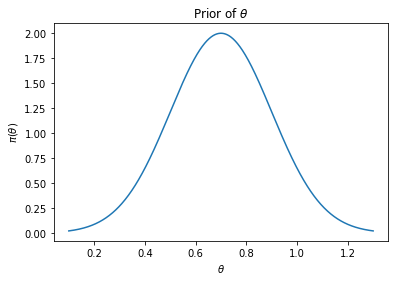

In [3]:
def plot_prior(mean=0.7, sigma=0.2):
    x = np.linspace(mean - 3*sigma, mean + 3*sigma, 1000)
#     plt.plot(x, stats.norm.pdf(x, mean, sigma))
    fig, ax = plt.subplots()
    ax.plot(x, prior(x))
    ax.set_title(r'Prior of $\theta$')
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$\pi(\theta)$')
    
plot_prior()

In [4]:
def model(data, mean, sigma=1):
    return stats.norm(loc=mean, scale=sigma).pdf(data)

model(0.2, mean=0)

0.3910426939754559

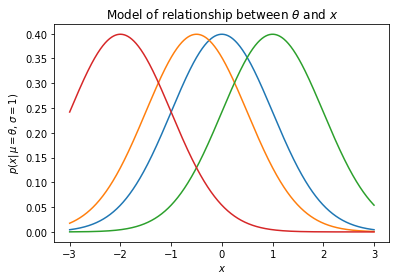

In [5]:
# Need to redo this so that it is clear it is a likelihood, right now looks like p.d.f.

def plot_model(mean=[0, -0.5, 1., -2.], sigma=1):
    x = np.linspace(0 - 3*sigma, 0 + 3*sigma, 1000)
#     plt.plot(x, stats.norm.pdf(x, mean, sigma))
    fig, ax = plt.subplots()
    [ax.plot(x, model(x, mean=theta)) for theta in mean]
    ax.set_title(r'Model of relationship between $\theta$ and $x$')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$p(x|\,\mu=\theta, \sigma=1)$')
    
plot_model()

Generate pseudodata, which in this example are drawn from a Normal distribution with mean of $0.92$

$$
x \sim N\left(\mu=0.92, \sigma = 1\right)
$$

In [6]:
# Generate some data and then can do a likelihood
n_observations = 5
data = np.random.normal(0.92, 1., n_observations)

In [7]:
def likelihood(mean, data, sigma=1):
    return np.prod(model(data, mean, sigma=sigma))

likelihood(0.2, data)

# return np.prod(gaussian(data, parameters[0], parameters[1]))

7.441758457025799e-07

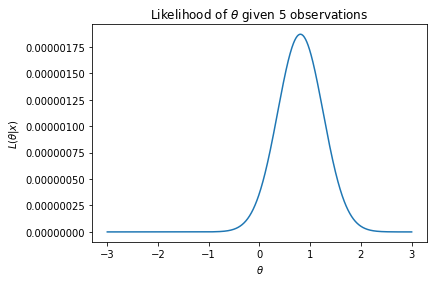

In [8]:
# Need to redo this so that it is clear it is a likelihood, right now looks like p.d.f.

def plot_likelihood(data, sigma=1):
    theta = np.linspace(0 - 3*sigma, 0 + 3*sigma, 1000)
    
    fig, ax = plt.subplots()
    ax.plot(theta, np.asarray([likelihood(mean, data, sigma=1) for mean in theta]))
    ax.set_title(rf'Likelihood of $\theta$ given {len(data)} observations')
    ax.set_xlabel(r'$\theta$')
    ax.set_ylabel(r'$L(\theta|x)$')
    
plot_likelihood(data)

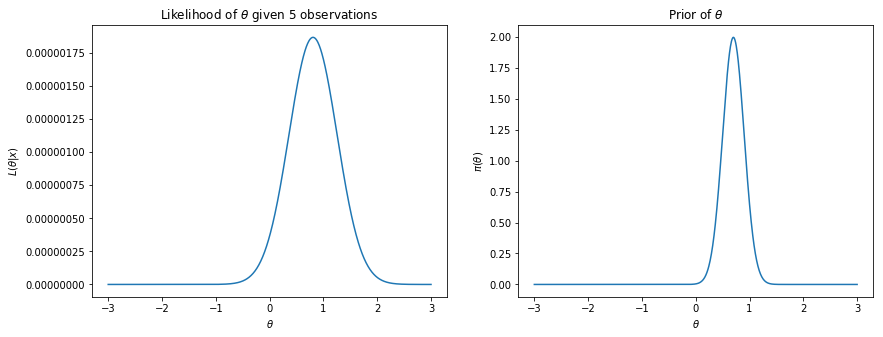

In [9]:
def plot_prior_and_likelihood(data, mean, sigma):
    x = np.linspace(mean - 3*sigma, mean + 3*sigma, 1000)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    # Likelihood
    ax[0].plot(x, np.asarray([likelihood(mean, data, sigma=1) for mean in x]))
    ax[0].set_title(rf'Likelihood of $\theta$ given {len(data)} observations')
    ax[0].set_xlabel(r'$\theta$')
    ax[0].set_ylabel(r'$L(\theta|x)$')
    
    # Prior
    ax[1].plot(x, prior(x))
    ax[1].set_title(r'Prior of $\theta$')
    ax[1].set_xlabel(r'$\theta$')
    ax[1].set_ylabel(r'$\pi(\theta)$')
    
plot_prior_and_likelihood(data, 0, 1)

From here calculate joint, and show that as using Normal distributions their joint is also Normal. From there can show that for this contrived case the evidence has an analytical solution and so the posterior can be analytically found.

Can there create a 2X2 plot that shows likelihood (upper left), prior (upper right), posterior (lower left), posterior, normalized likelihood, and prior (lower right)

In [ ]:
# TODO: Figure out classes to make this better
class Distribution:
    """Distribution"""
    def __init__(self, loc, scale):
        self.loc = loc
        self.scale = scale
        
    def pdf(x):
        pass

    def f(self):
        return 'hello world'

In [ ]:
def plot_distribution():
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
  pass  